
# Selección de modelo para mezcla de gaussianas

En este ejemplo, se muestra como utilizar **BIC** para seleccionar el modelo completo, el número de elementos de la mezcla, y el tipo de matriz de covarianza.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import itertools

from scipy import linalg
from sklearn import mixture
from matplotlib.patches import Ellipse

In [2]:
# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0.0, -0.1], [1.7, 0.4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C), 0.7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

In [3]:
# Bayesian Information Criterium
bic = []
lowest_bic = np.infty

n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)

In [4]:
color_iter = itertools.cycle(
    ['limegreen', 'orchid', 'aqua', 'magenta', 'violet', 'deeppink', 'crimson', 'fuchsia', 'blue']
)

clf = best_gmm
bars = []

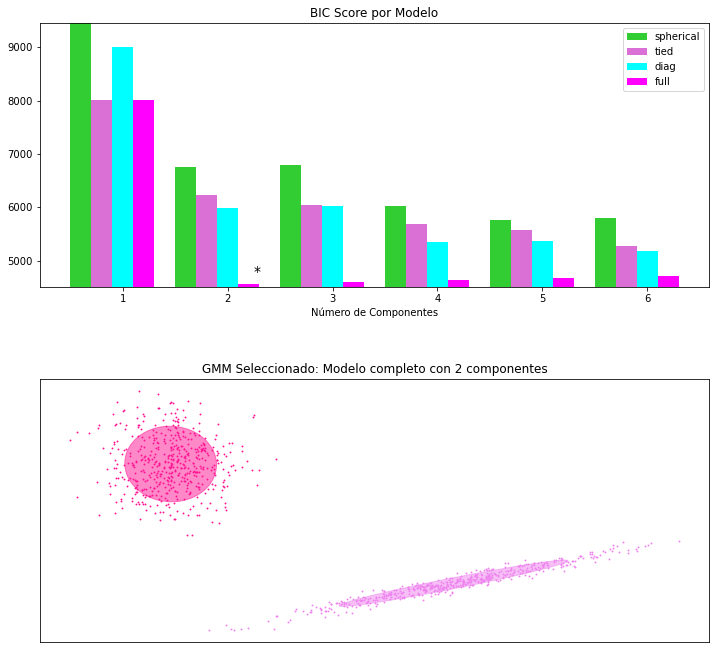

In [5]:
plt.figure(figsize=(12, 10))

# Plot the BIC Scores
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(plt.bar(xpos,
                        bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
                        width=0.2,
                        color=color))

plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title('BIC Score por Modelo')
xpos = np.mod(bic.argmin(), len(n_components_range)) + 0.65 + 0.2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Número de Componentes')
spl.legend([b[0] for b in bars], cv_types)

# Plot the Winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_, color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi # Convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ell = Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title('GMM Seleccionado: Modelo completo con 2 componentes')
plt.subplots_adjust(hspace=0.35, bottom=0.02)

plt.show()